In [1]:
import sys
sys.path.append('../Scripts')

# # for reading datafiles 
import pandas as pd
# import script that has many standard functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [38]:
# things for figuring out the SFRD labels in the data 

MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    







def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

from KDEpy import FFTKDE
from scipy.stats import norm

colors = [ '#ff7f0e', '#1f77b4']
colors_lighter = [adjust_lightness(color=colors[0], amount=1.7), adjust_lightness(color=colors[1], amount=2.2)]







obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [41]:


def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='../dataFiles/summary_data_Fig_1/', which='MRRvsNotMRR'):
    """ plots the formation yield of BHBH, BHNS and NSNS as a function of metallicity
    it uses as input the formationRatesTotalAndPerChannel datafiles (see Zenodo for files) that 
    should be located in the user-specified directory pathCSVfile 
    alphabetDirDict are the names of the simulated data that one wants to plot, 
    """
    
    ncols, nrows = 1, 1  # set figure size and properties
    f, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  

    ## CONSTANTS AND other things 
    Types      = ['BBH']
    dictDCOtypeDCOlabel = {'BBH':'BHBH'}
    DCOtype='BBH'
    # different marker shape types used 
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    zorderlist = Reverse(range(nModels+3)) # the zorder for the models
    
    # solar metallicity used to aid the reader 
    solar = 0.0142

    # define metallicity array (these are the metallicities of the simulations)
    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]
    log10metallicities= np.log10(np.asarray(metallicities))
    
    lw, ms=4, 9 # line width and marker size for plots 
    y_top=35/1E5  # max Y value to plot 
    
    # axes labels
    nameX = r'$\log_{10}(Z)$'
    nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [\rm{M}_{\odot}^{-1}]\   $'

    # iterate over the different DCO types (BHBH, BHNS and NSNS)

    axe = ax # plot each DCOtype on a new subplot 
    print('now at DCO type  ', DCOtype)




    DCOname = dictDCOtypeDCOlabel[DCOtype] # label name for DCO type 
    df = pd.read_csv(pathCSVfile, index_col=0) # read in data 

    for ind_m, bps_model in enumerate(BPSnameslist):

        # label for legend
        labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] 

        if which=='MRRvsNotMRR':
            plotList = ['MRR', 'nonMRR']
        elif which=='MRRvsNotMRR_spin':
            plotList = ['MRR_spin', 'nonMRR_spin']
        for ind_mrr, which_MRR in enumerate(plotList):
        # key name of the headers in the datafile, we want the 'total' yield that is given in units of Msun for each model
        # the dataframe gives the yield as a list of metallicities 
            key_ =  bps_model + ' ' + which_MRR+ '  [Msun^{-1}]'
            upperY = np.asarray(df[key_]) # formation yield per metallicity for this channel 



            axe.plot(log10metallicities, upperY, color=colors[ind_mrr] , \
                      lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)


#         # add facecolor to indicate regions above and below fiducial (model index 0) formation yields
#         if ind_m==0:
#             axe.fill_between(log10metallicities, (1E-3/1E5)*np.ones_like(upperY), upperY, color='gray', alpha=0.1)
#             axe.fill_between(log10metallicities,  upperY, (100)*np.ones_like(upperY)/1E5,color='gray', alpha=0.4)     

            
        
#         if ind_t ==0:  
#             # get legend labels
    handles, labels = axe.get_legend_handles_labels()


    text_list = [r'$Z=Z_{\odot}$', r'$Z=Z_{\odot}/2$', \
                 r'$Z=Z_{\odot}/5$',  r'$Z=Z_{\odot}/10$',\
                 r'$Z=0.001$', r'$Z=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        axe.plot([zz,zz], [0,y_top+1/1E5], \
                         c='k',\
                         lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
    # add metallicity values as text to metallicity lines
#     if ind_t==0:
        axe.text(zz-0.038, 1.2*0.001/1E5, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
#     else:
#         axe.text(zz-0.038, y_top-0.5/1E5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')


        # set axes name  
    axe = layoutAxes(axe, nameX=nameX, nameY=nameY)

    # set yscale and x and y limits 
    axe.set_yscale('log')
    axe.set_xlim(min(log10metallicities), max(log10metallicities))
    axe.set_ylim(bottom=0.001/1E5,top=y_top)


#     # add box with label to indicate which DCO type we are plotting in the top left of each panel   
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#     axe.annotate(r'%s'%(DCOname), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)



    # add legend, 
    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=19, ncol=5,\
         bbox_to_anchor=(0.99, 1.56)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig('./MRRvsNonMRR_per_Metallicity_'+ which+'.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.savefig('./MRRvsNonMRR_per_Metallicity_'+ which+'.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

    

    



now at DCO type   BBH


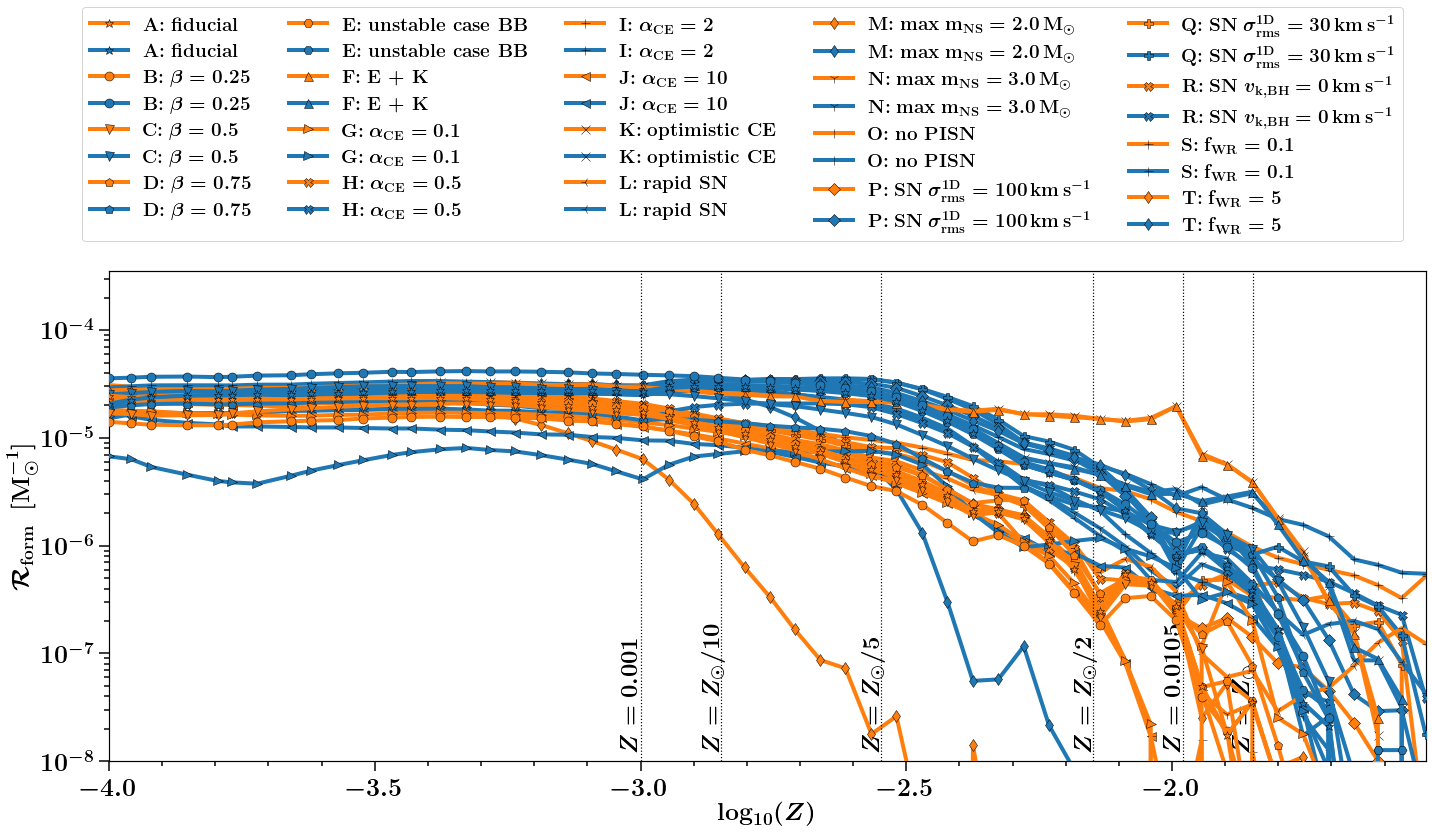

now at DCO type   BBH


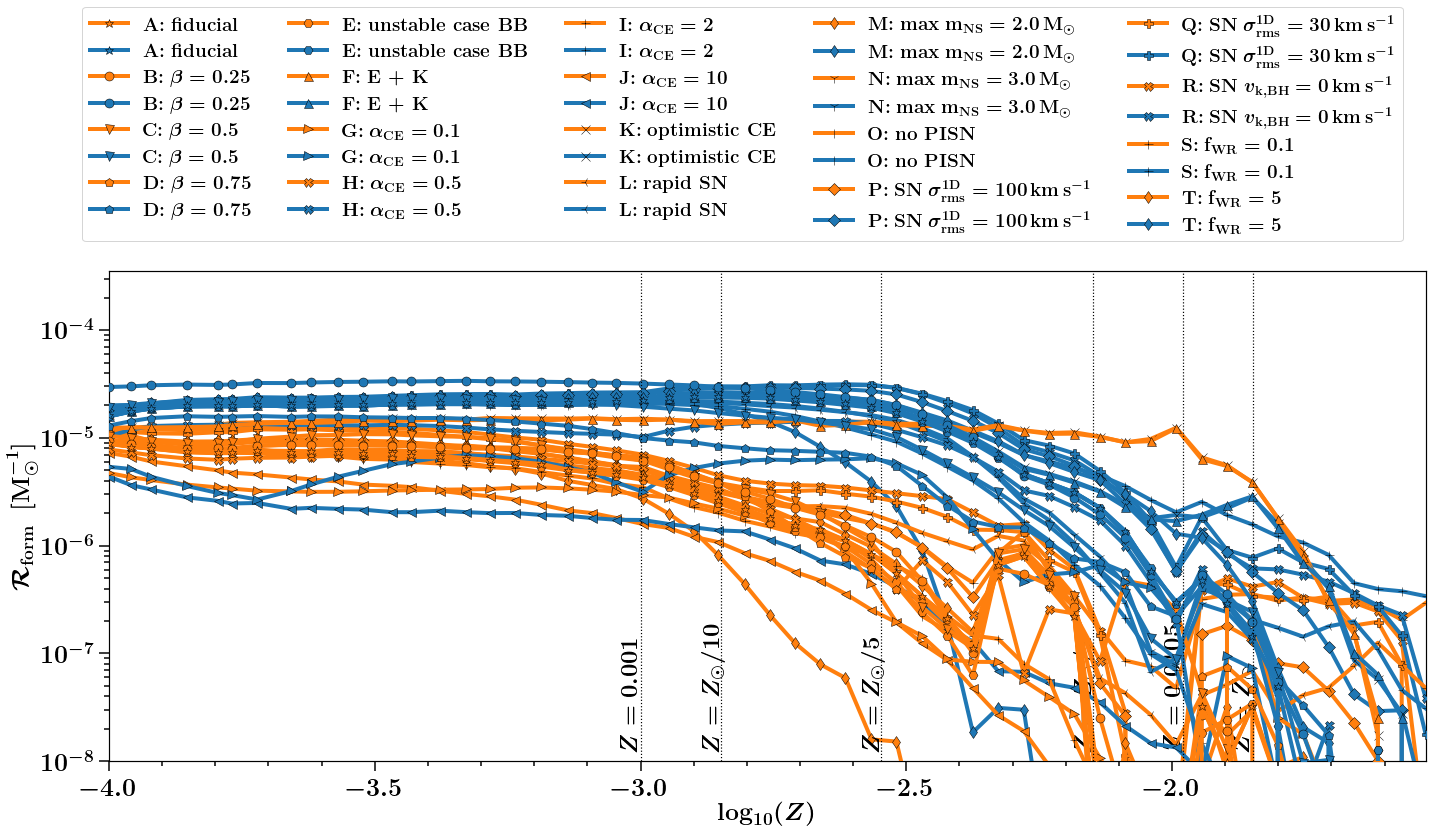

In [42]:

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/MRRformationRatesperMetallicity_BHBH_.csv', which='MRRvsNotMRR')    
    
    
# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/MRRformationRatesperMetallicity_BHBH_.csv', which='MRRvsNotMRR_spin')    
        
